In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement import plot_basic
from kid_readout.measurement.io import npy

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2016-12-12_181613_r1h14_lo_sweep.npd/')

In [4]:
npd.node_names()

['SingleSweepStream0',
 'ADCSnap1',
 'SingleSweepStream2',
 'ADCSnap3',
 'SingleSweepStream4',
 'ADCSnap5',
 'SingleSweepStream6',
 'ADCSnap7',
 'SingleSweepStream8',
 'ADCSnap9',
 'SingleSweepStream10',
 'ADCSnap11',
 'SingleSweepStream12',
 'ADCSnap13',
 'SingleSweepStream14',
 'ADCSnap15',
 'SingleSweepStream16',
 'ADCSnap17',
 'SingleSweepStream18',
 'ADCSnap19',
 'SingleSweepStream20',
 'ADCSnap21',
 'SingleSweepStream22',
 'ADCSnap23',
 'SingleSweepStream24',
 'ADCSnap25',
 'SingleSweepStream26',
 'ADCSnap27',
 'SingleSweepStream28',
 'ADCSnap29',
 'SingleSweepStream30',
 'ADCSnap31',
 'SingleSweepStream32',
 'ADCSnap33']

In [5]:
all_sss = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStream')]

In [6]:
[sss.stream.filterbank_bin for sss in all_sss]

[362,
 362,
 362,
 362,
 361,
 361,
 361,
 361,
 361,
 361,
 361,
 360,
 360,
 360,
 360,
 360,
 360]

In [7]:
sss_same = [sss for sss in all_sss if sss.stream.filterbank_bin == 361]

In [8]:
len(sss_same)

7

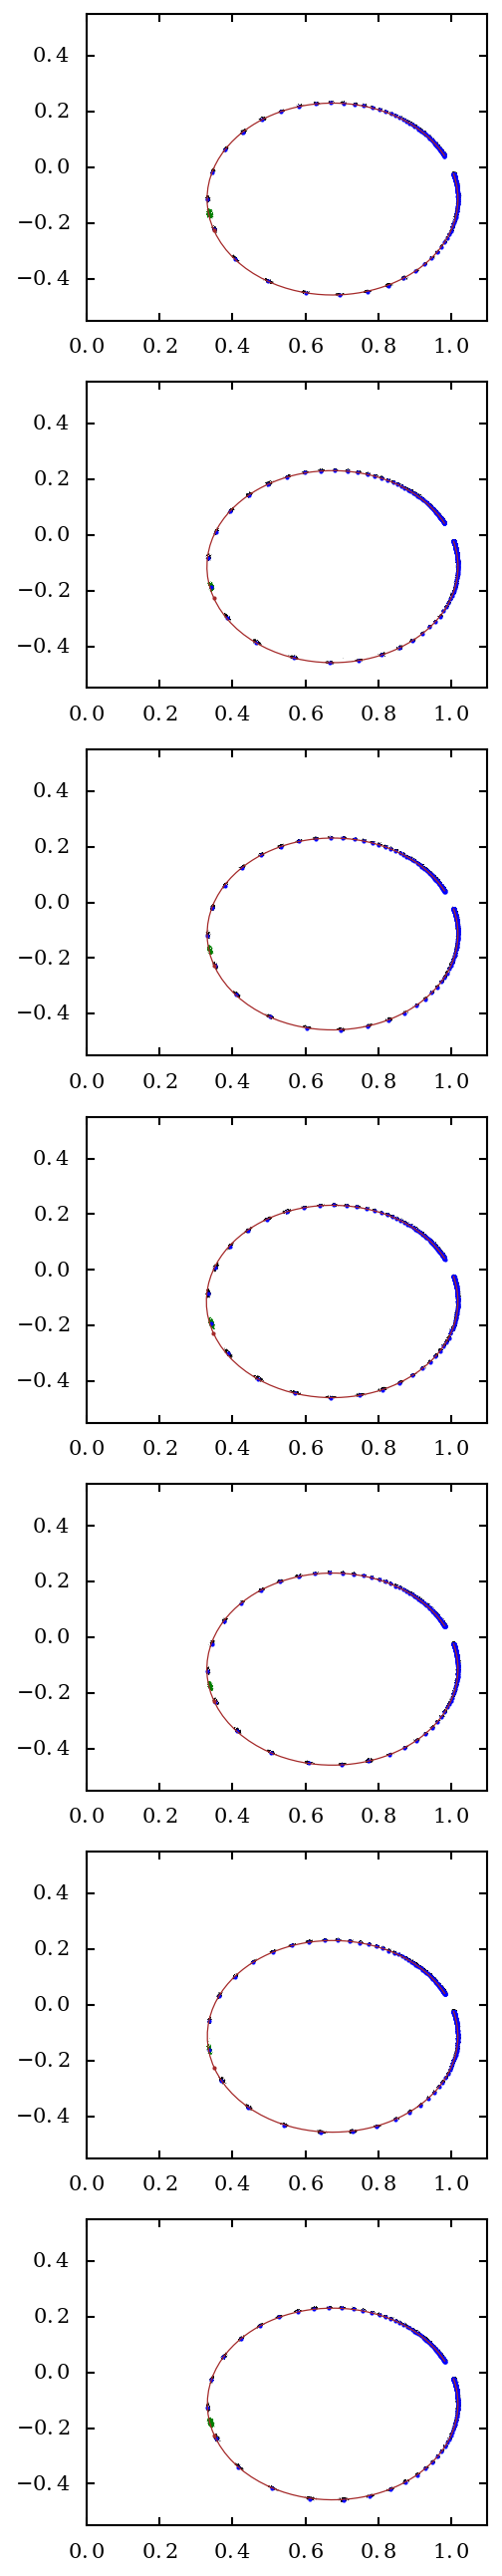

In [9]:
fig, axes = plt.subplots(len(sss_same), 1, figsize=(2, 2 * len(sss_same)))
for sss, ax in zip(sss_same, axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax, normalize=True)
    ax.tick_params(labelsize=5)
    ax.set_xlim(0, 1.1)
    ax.set_ylim(-0.55, 0.55);

In [10]:
[sss.stream.tone_offset_frequency()[0] for sss in sss_same]

[0.375, 0.25, 0.125, 0.0, -0.125, -0.25, -0.375]

In [11]:
[sss.stream.tone_offset_frequency()[0] for sss in all_sss]

[-0.125,
 -0.25,
 -0.375,
 -0.5,
 0.375,
 0.25,
 0.125,
 0.0,
 -0.125,
 -0.25,
 -0.375,
 0.5,
 0.375,
 0.25,
 0.125,
 0.0,
 -0.125]

In [12]:
offset_mappable = plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-0.5, vmax=0.5),
                                        cmap=plt.cm.plasma)
offset_mappable.set_array(np.linspace(-0.5, 0.5, 3))

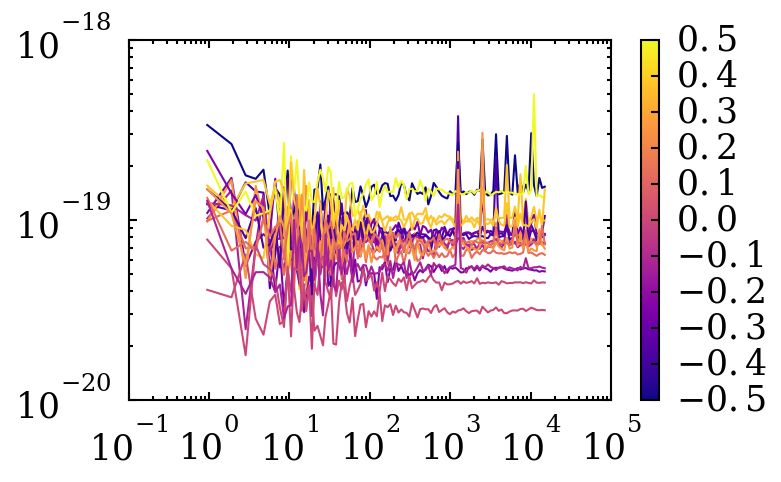

In [13]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
for sss in all_sss:
    ax.plot(sss.S_frequency, sss.S_yy, color=offset_mappable.to_rgba(sss.stream.tone_offset_frequency()[0]))
fig.colorbar(mappable=offset_mappable, ax=ax)

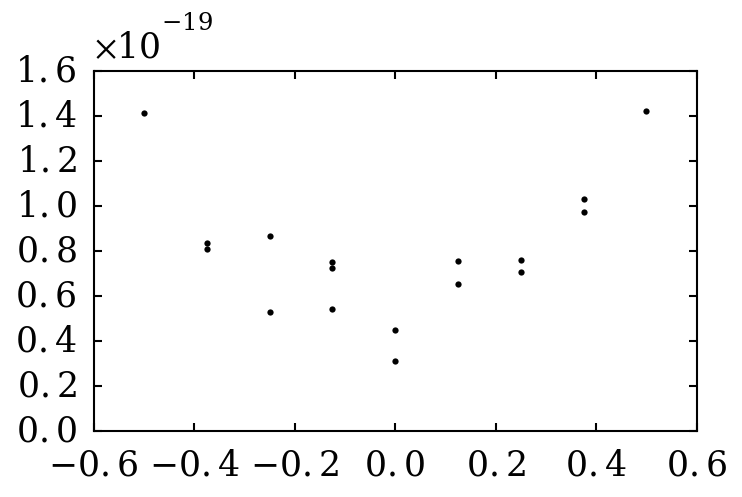

In [14]:
fig, ax = plt.subplots()
ax.set_ylim(0, 1.6e-19)
for sss in all_sss:
    ax.plot(sss.stream.tone_offset_frequency(), 
            np.median(sss.S_yy),
            '.k')

# Filterbank bin 361

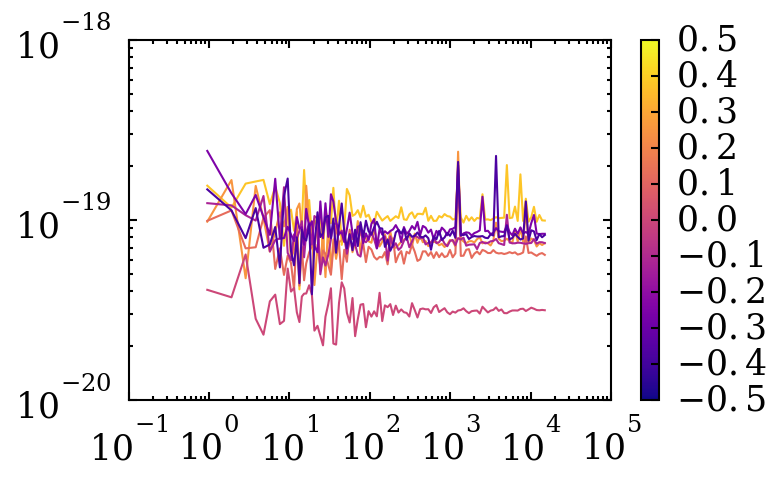

In [15]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
for sss in sss_same:
    ax.plot(sss.S_frequency, sss.S_yy, color=offset_mappable.to_rgba(sss.stream.tone_offset_frequency()[0]))
fig.colorbar(mappable=offset_mappable, ax=ax)

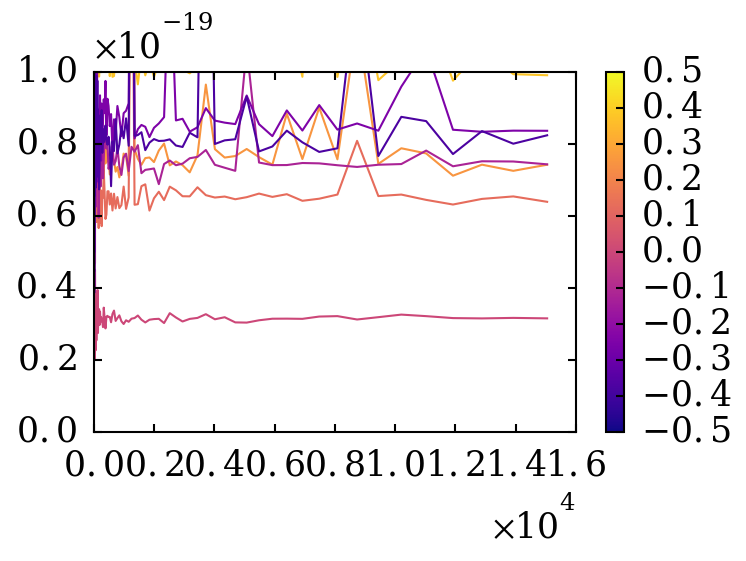

In [16]:
fig, ax = plt.subplots()
ax.set_ylim(0, 1e-19)
for sss in sss_same:
    ax.plot(sss.S_frequency, sss.S_yy, color=offset_mappable.to_rgba(sss.stream.tone_offset_frequency()[0]))
fig.colorbar(mappable=offset_mappable, ax=ax)

# Why do none of the previous noise data turn up like this?

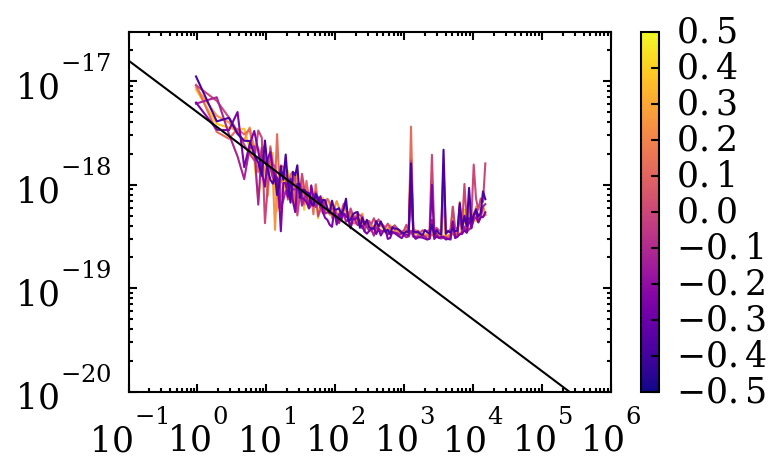

In [17]:
ff = np.logspace(-1, 6, 1000)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-20, 3e-17)
for sss in sss_same:
    ax.plot(sss.S_frequency, sss.S_xx, color=offset_mappable.to_rgba(sss.stream.tone_offset_frequency()[0]))
fig.colorbar(mappable=offset_mappable, ax=ax)
ax.plot(ff, 5e-18 * ff**(-1/2), '-k');